## Ejercicio 1

a) Calcule la correlación lineal entre los atributos Ala y Cola. Indique la intensidad de la correlación (no hay
correlación/débil/fuerte) y el tipo (positiva/negativa)

In [43]:
import pandas as pd

url="hawks.csv"
df=pd.read_csv("hawks.csv", encoding='latin-1',sep=";")
print("La correlacion lineal entre Ala y Cola es:")
print(df["Ala"].corr(df["Cola"]))


La correlacion lineal entre Ala y Cola es:
0.8998883674343949


#### Correlacion fuerte positiva

b) Complete el cuadro con los valores del atributo Hallux antes y después de normalizarlos utilizando media
y desvío. 

In [44]:
# Calcular medidas estadísticas para Hallux 
Hallux_data = df['Hallux']
q1 = Hallux_data.quantile(0.25)
q2 = Hallux_data.quantile(0.50)  # Mediana
q3 = Hallux_data.quantile(0.75)
iqr = q3 - q1

# Bigotes (1.5 * IQR)
lower_whisker = q1 - 3 * iqr
upper_whisker = q3 + 3 * iqr
lower_whisker_leve = q1 - 1.5 * iqr


print("Medidas estadísticas del atributo 'Hallux' Antes de normalizar:")
print(f"Mínimo.........: {Hallux_data.min():.2f}")
print(f"Máximo.........: {Hallux_data.max():.2f}")
print(f"Q1.............: {q1:.2f}")
print(f"Q2 (Mediana)...: {q2:.2f}")
print(f"Q3.............: {q3:.2f}")
print(f"RIC............: {iqr:.2f}")
print(f"Bigote inferior extremo: {lower_whisker:.2f}")
print(f"Bigote superior extremo: {upper_whisker:.2f}")
print(f"Bigote inferior leve: {lower_whisker_leve:.2f}")



Medidas estadísticas del atributo 'Hallux' Antes de normalizar:
Mínimo.........: 95.00
Máximo.........: 3414.00
Q1.............: 152.00
Q2 (Mediana)...: 295.00
Q3.............: 315.00
RIC............: 163.00
Bigote inferior extremo: -337.00
Bigote superior extremo: 804.00
Bigote inferior leve: -92.50


In [45]:
# Declaro la funcion para normalizar los datos de una columna
def normalize_standard(serie):
    """Calcula Z-Score: (x - media) / desviacion_estandar"""
    # Usamos ddof=1 para la desviación muestral
    return (serie - serie.mean()) / serie.std(ddof=1)

#Normalizo Hallux
df_norm=df
df_norm["Hallux"]=normalize_standard(df_norm["Hallux"])
    
# Calcular medidas estadísticas para Hallux normalizados
Hallux_data_norm = df_norm['Hallux']
q1 = Hallux_data_norm.quantile(0.25)
q2 = Hallux_data_norm.quantile(0.50)  # Mediana
q3 = Hallux_data_norm.quantile(0.75)
iqr = q3 - q1

# Bigotes (1.5 * IQR)
lower_whisker = q1 - 3 * iqr
upper_whisker = q3 + 3 * iqr

print("Medidas estadísticas del atributo 'Hallux' Despues de normalizar:")
print(f"Mínimo.........: {Hallux_data_norm.min():.2f}" )
print(f"Máximo.........: {Hallux_data_norm.max():.2f}" )
print(f"Q1.............: {q1:.2f}")
print(f"Q2 (Mediana)...: {q2:.2f}")
print(f"Q3.............: {q3:.2f}")
print(f"RIC............: {iqr:.2f}")
print(f"Bigote inferior: {lower_whisker:.2f}")
print(f"Bigote superior: {upper_whisker:.2f}")


Medidas estadísticas del atributo 'Hallux' Despues de normalizar:
Mínimo.........: -0.61
Máximo.........: 9.72
Q1.............: -0.43
Q2 (Mediana)...: 0.01
Q3.............: 0.07
RIC............: 0.51
Bigote inferior: -1.96
Bigote superior: 1.59


I. El valor de Q2 normalizado permite afirmar que la media y la mediana tienen valores cercanos(F).
II. El máximo valor de Hallux se encuentra a más de 9 desvíos por encima de la media(V)( df["Hallux"].std(ddof=1)*9+ df["Hallux"].mean().)
III. Un hallux que mida más de 600 mm es considerado atípico extremo(F).
IV. Un valor normalizado del atributo “hallux” de 2 se considerará un valor atípico extremo(V).
V. En un gavilán es atípico que su hallux mida menos de 100 mm(F)

## Ejercicio 2

Numerice los atributos de la siguiente forma:
* Color = 1 si es rojo y 0 si es amarillo
* SeEstira? = 1 para Si y 0 para No
* Edad = 1 si es adulto y 0 si es Nene
* Tamanio = 0 si es Chico, 0.5 si es mediano y 1 si es grande

In [103]:
url= "Globos.csv"
df=pd.read_csv(url)

In [105]:
df

,Color,Tamanio,Se_estira?,Edad,Inflado?
0,Amarillo,Chico,Si,Adulto,Si
1,Amarillo,Chico,Si,Nene,Si
2,Amarillo,Chico,No,Adulto,No
3,Amarillo,Chico,No,Nene,No
4,Amarillo,Grande,Si,Adulto,Si
5,Amarillo,Grande,Si,Nene,Si
6,Amarillo,Mediano,No,Adulto,No
7,Amarillo,Mediano,No,Nene,No
8,Rojo,Chico,Si,Adulto,Si
9,Rojo,Chico,Si,Nene,No


In [106]:
mapeo={"Color":{"Rojo":1,"Amarillo":0}, "Se_estira?": {"Si":1,"No":0}, "Edad":{"Adulto":1,"Nene":0}, "Tamanio":{"Grande":1,"Mediano":0.5,"Chico":0},
       "Inflado?":{"Si":1,"No":0}}
df=df.replace(mapeo).infer_objects(copy=False)

C:\Users\ignac\AppData\Local\Temp\ipykernel_5568\3283944295.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace(mapeo).infer_objects(copy=False)


In [107]:
df

,Color,Tamanio,Se_estira?,Edad,Inflado?
0,0,0.0,1,1,1
1,0,0.0,1,0,1
2,0,0.0,0,1,0
3,0,0.0,0,0,0
4,0,1.0,1,1,1
5,0,1.0,1,0,1
6,0,0.5,0,1,0
7,0,0.5,0,0,0
8,1,0.0,1,1,1
9,1,0.0,1,0,0


Indique cuáles de los siguientes perceptrones pueden clasificar correctamente todos los ejemplos
normalizados del archivo Globos.csv:
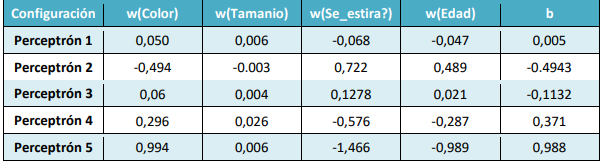

In [137]:
def aplicarPerceptron(df,w1,w2,w3,w4,b):
    matriz=df.values
    cant_aciertos=0
    for i, fila in enumerate(matriz):
        if(fila[0]*w1+fila[1]*w2+ fila[2]*w3+ fila[3]*w4 + b)>=0:
            prediccion=1
        else:
            prediccion=0
        if(prediccion==fila[4]):
           cant_aciertos=cant_aciertos+1
    return cant_aciertos


cant_filas=len(df)
#Perceptron 1
cant_aciertos=aplicarPerceptron(df,0.05,0.006,-0.068,-0.047,0.005)
porcentaje= (cant_aciertos/cant_filas)*100
print("La cantidad de aciertos del primer preceptron son un total de %d de %d, es decir, un %f"%(cant_aciertos,cant_filas, porcentaje))

#Perceptron 2
cant_aciertos=aplicarPerceptron(df,-0.494,-0.003,0.722,0.489,-0.4943)
porcentaje= (cant_aciertos/cant_filas)*100
print("La cantidad de aciertos del segundo preceptron son un total de %d de %d, es decir, un %f"%(cant_aciertos,cant_filas, porcentaje))

#Perceptron 3
cant_aciertos=aplicarPerceptron(df,0.06,0.004,0.12778,0.021,-0.1132)
porcentaje= (cant_aciertos/cant_filas)*100
print("La cantidad de aciertos del tercer preceptron son un total de %d de %d, es decir, un %f"%(cant_aciertos,cant_filas, porcentaje))

#Perceptron 4
cant_aciertos=aplicarPerceptron(df,0.296,0.026,-0.576,-0.287,0.371)
porcentaje= (cant_aciertos/cant_filas)*100
print("La cantidad de aciertos del cuarto preceptron son un total de %d de %d, es decir, un %f"%(cant_aciertos,cant_filas, porcentaje))
#Perceptron 5
cant_aciertos=aplicarPerceptron(df,0.994,0.006,-1.466,-0.989,0.988)
porcentaje= (cant_aciertos/cant_filas)*100
print("La cantidad de aciertos del quinto preceptron son un total de %d de %d, es decir, un %f"%(cant_aciertos,cant_filas, porcentaje))


La cantidad de aciertos del primer preceptron son un total de 4 de 16, es decir, un 25.000000
La cantidad de aciertos del segundo preceptron son un total de 16 de 16, es decir, un 100.000000
La cantidad de aciertos del tercer preceptron son un total de 14 de 16, es decir, un 87.500000
La cantidad de aciertos del cuarto preceptron son un total de 0 de 16, es decir, un 0.000000
La cantidad de aciertos del quinto preceptron son un total de 1 de 16, es decir, un 6.250000


## Ejercicio 3

a) Luego de la numerización se calculó el coeficiente de correlación lineal entre los atributos EDAD y RIESGO
y se obtuvo como resultado -0.71. ¿Cómo debe interpretarse este valor?

Ese valor debe interpretarse como una correlacion debil negativa

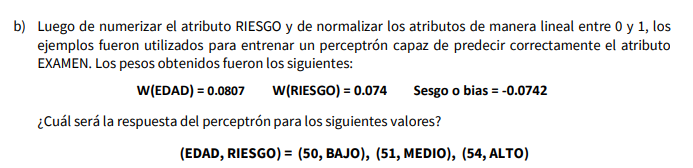

In [153]:
from sklearn import preprocessing
import numpy as np
def aplicar(listaEdad,listaRiesgo):
    prediccion=[]
    for i in range(3):
        if(listaEdad[i]*0.0807+listaRiesgo[i]*0.074 -0.0742)>=0:
            prediccion.append(1)
        else:       
            prediccion.append(0)
            
    return prediccion

normalizador=preprocessing.MinMaxScaler()
listaEdad=np.array([50,51,54])
listaRiesgo=np.array([1,2,3])
listaEdad = listaEdad.reshape(-1, 1)
listaRiesgo = listaRiesgo.reshape(-1, 1)
listaEdad=normalizador.fit_transform(listaEdad)
listaRiesgo=normalizador.fit_transform(listaRiesgo)
display(aplicar(listaEdad,listaRiesgo))



[0, 0, 1]